<a href="https://colab.research.google.com/github/AsianaHolloway/Breast-Cancer-Detection-Using-Machine-Learning/blob/main/Breast_Cancer_Detection_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Check Python Version
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

#Note: #this will be for computational functions and arrays
#responsible for handling plotting results
#responsible for handling our data sets
#responsible for getting ML packages

#If lines error out, then go back and do conda install package name
print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
scipy: 1.16.3
numpy: 2.0.2
matplotlib: 3.10.0
pandas: 2.2.2
sklearn: 1.6.1


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
#load dataset from Internet
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape',
         'marginal_adhesion','single_epithelial_size','bare_nuclei',
         'bland_chromatin','normal_nucleoli','mitoses','class']
df = pd.read_csv(url, names=names)


In [ ]:
#Preprocess the data
df.replace('?', 99999, inplace=True)
print(df.axes)

df.drop(['id'], axis=1, inplace=True)


[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [ ]:
#describe the data
print(df.describe())


       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


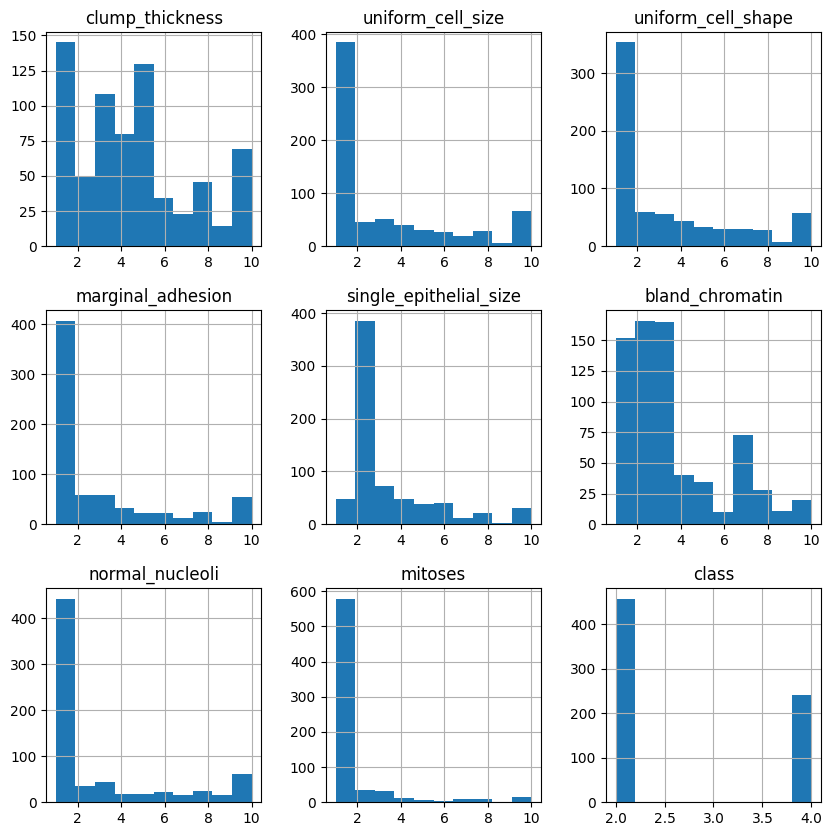

In [ ]:
#plot histograms for each variable
df.hist(figsize = (10,10))
plt.show()


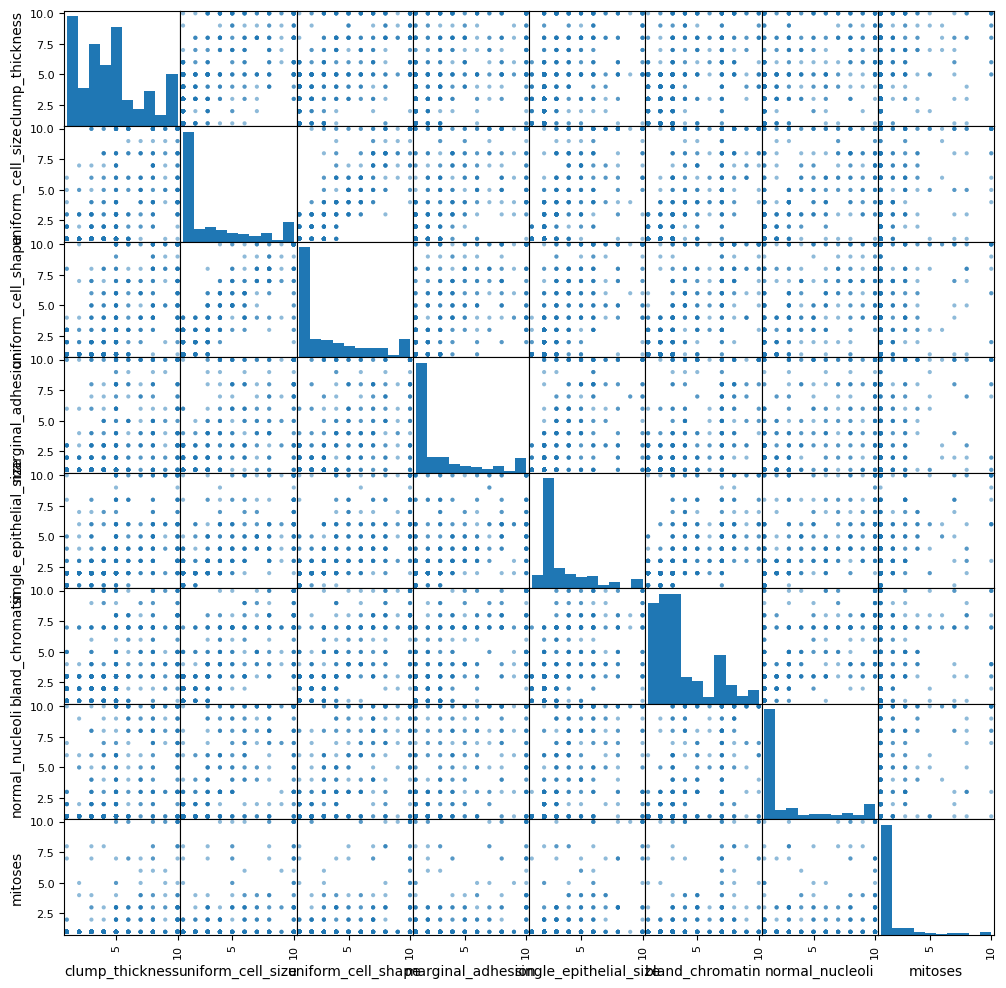

In [ ]:
# scatterplot matrix of features (excluding 'class' on axes)
scatter_matrix(df.drop('class', axis=1), figsize=(12,12))
plt.show()


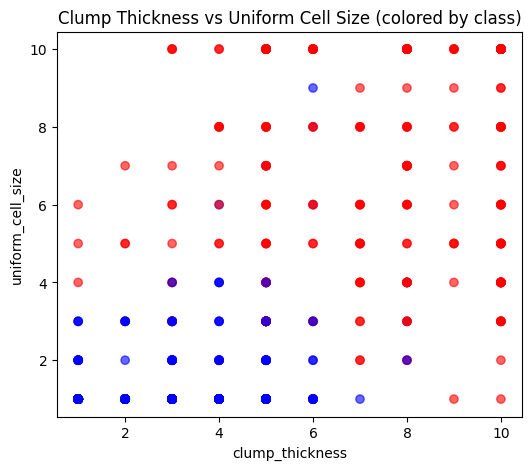

In [ ]:
# simple 2D scatter example: clump_thickness vs uniform_cell_size, colored by class
colors = df['class'].map({2: 'blue', 4: 'red'})  # In this dataset, 2=benign, 4=malignant
plt.figure(figsize=(6,5))
plt.scatter(df['clump_thickness'], df['uniform_cell_size'], c=colors, alpha=0.6)
plt.xlabel('clump_thickness')
plt.ylabel('uniform_cell_size')
plt.title('Clump Thickness vs Uniform Cell Size (colored by class)')
plt.show()


In [ ]:
# Create X (features) and y (labels)
X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])


In [ ]:
from sklearn.model_selection import train_test_split

seed = 8

# 80% train_full + 20% test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.20, random_state=seed, stratify=y
)

# From the 80% train_full, take 25% as validation (i.e., 0.8 * 0.25 = 0.20 of total)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=seed, stratify=y_train_full
)

print("Shapes:")
print("X_train:", X_train.shape, "X_valid:", X_valid.shape, "X_test:", X_test.shape)


Shapes:
X_train: (419, 9) X_valid: (140, 9) X_test: (140, 9)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC()))  # default kernel='rbf'


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# In this dataset: 2 = benign, 4 = malignant.
# We'll treat malignant (4) as the positive class for precision/recall/F1.
POS_LABEL = 4

for name, model in models:
    model.fit(X_train, y_train)             # train only on the TRAIN split
    y_pred = model.predict(X_valid)         # evaluate on VALIDATION split

    acc  = accuracy_score(y_valid, y_pred)
    prec = precision_score(y_valid, y_pred, pos_label=POS_LABEL, zero_division=0)
    rec  = recall_score(y_valid, y_pred,    pos_label=POS_LABEL, zero_division=0)
    f1   = f1_score(y_valid, y_pred,        pos_label=POS_LABEL, zero_division=0)

    print(f"\n=== {name} on VALIDATION ===")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))
    print("\nClassification Report:\n", classification_report(
        y_valid, y_pred, labels=[2,4], target_names=['benign(2)','malignant(4)'], zero_division=0
    ))



=== KNN on VALIDATION ===
Accuracy : 0.9642857142857143
Precision: 0.9387755102040817
Recall   : 0.9583333333333334
F1-score : 0.9484536082474226
Confusion Matrix:
 [[89  3]
 [ 2 46]]

Classification Report:
               precision    recall  f1-score   support

   benign(2)       0.98      0.97      0.97        92
malignant(4)       0.94      0.96      0.95        48

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140


=== SVM on VALIDATION ===
Accuracy : 0.6571428571428571
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
Confusion Matrix:
 [[92  0]
 [48  0]]

Classification Report:
               precision    recall  f1-score   support

   benign(2)       0.66      1.00      0.79        92
malignant(4)       0.00      0.00      0.00        48

    accuracy                           0.66       140
   macro avg       0.33      0.50      0.40       140
weighted avg       0.43   